In [1]:
import pandas as pd
import numpy as np
import re
import sklearn
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
#  some common algorithm
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.cross_validation import KFold

In [5]:

xx=pd.read_csv('c:/2datasets/train1.csv')

In [7]:
xx.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [8]:
xx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [17]:
xx['var_81'].describe()

count    200000.000000
mean         14.719024
std           2.299567
min           7.586500
25%          13.214775
50%          14.844500
75%          16.340800
max          23.132400
Name: var_81, dtype: float64

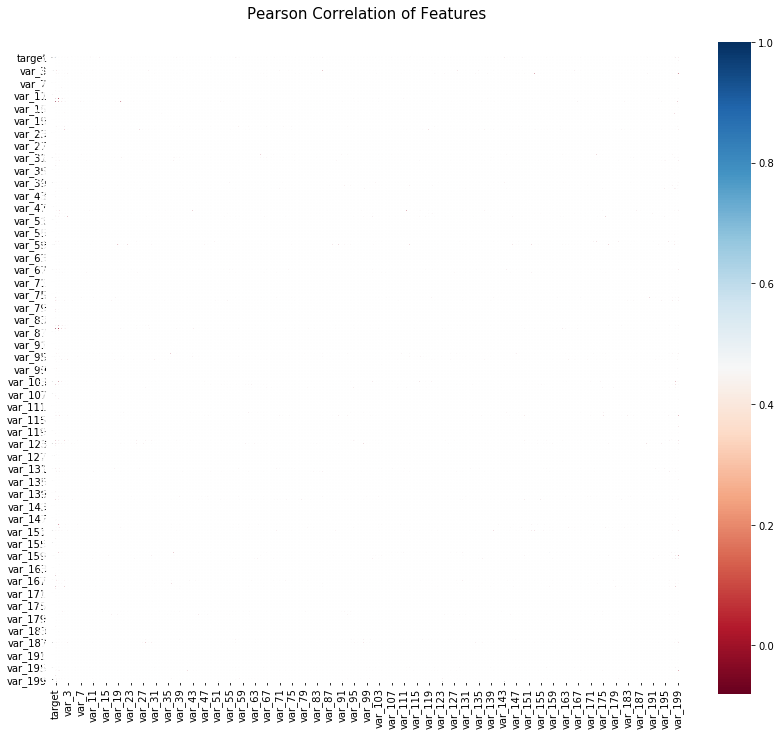

In [11]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features',y=1.05,size=15)
sns.heatmap(xx.corr(),linewidth=0.1,vmax=1.0,square=True,cmap=colormap,linecolor='white',annot=True)

In [14]:
corrmat=xx.corr()                                       #没有包含非数值类型
corrmat["target"].sort_values(ascending=False)        #对预测特征降序

target     1.000000
var_6      0.066731
var_110    0.064275
var_53     0.063399
var_26     0.062422
var_22     0.060558
var_99     0.058367
var_190    0.055973
var_2      0.055870
var_133    0.054548
var_0      0.052390
var_1      0.050343
var_179    0.050002
var_40     0.049530
var_184    0.048315
var_78     0.048245
var_170    0.047973
var_191    0.047114
var_94     0.046296
var_67     0.044673
var_18     0.043479
var_173    0.042022
var_164    0.040997
var_118    0.040358
var_147    0.040280
var_91     0.040127
var_89     0.039369
var_95     0.038531
var_155    0.037240
var_35     0.036567
             ...   
var_86    -0.039126
var_121   -0.039788
var_107   -0.039997
var_123   -0.040291
var_122   -0.042461
var_9     -0.042805
var_192   -0.042858
var_33    -0.044334
var_108   -0.044791
var_154   -0.046106
var_92    -0.046295
var_149   -0.047319
var_169   -0.048382
var_44    -0.049039
var_109   -0.049926
var_115   -0.050174
var_34    -0.052692
var_198   -0.053000
var_148   -0.055011


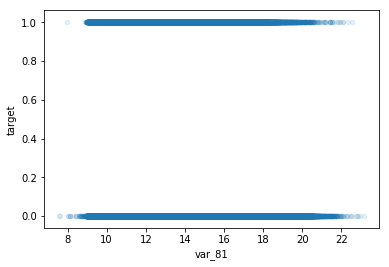

In [16]:
xx.plot(kind="scatter",x="var_81",y="target",alpha=0.1)  

In [18]:
print(corrmat)

           target     var_0     var_1     var_2     var_3     var_4     var_5  \
target   1.000000  0.052390  0.050343  0.055870  0.011055  0.010915  0.030979   
var_0    0.052390  1.000000 -0.000544  0.006573  0.003801  0.001326  0.003046   
var_1    0.050343 -0.000544  1.000000  0.003980  0.000010  0.000303 -0.000902   
var_2    0.055870  0.006573  0.003980  1.000000  0.001001  0.000723  0.001569   
var_3    0.011055  0.003801  0.000010  0.001001  1.000000 -0.000322  0.003253   
var_4    0.010915  0.001326  0.000303  0.000723 -0.000322  1.000000 -0.001368   
var_5    0.030979  0.003046 -0.000902  0.001569  0.003253 -0.001368  1.000000   
var_6    0.066731  0.006983  0.003258  0.000883 -0.000774  0.000049  0.002588   
var_7   -0.003025  0.002429  0.001511 -0.000991  0.002500  0.004549 -0.000995   
var_8    0.019584  0.004962  0.004098  0.002648  0.003553  0.001194  0.000147   
var_9   -0.042805 -0.002613 -0.000832 -0.001932 -0.000826 -0.000918 -0.005279   
var_10  -0.002213  0.000355 

In [19]:
import lightgbm 